# Data Analysis

# Dataset

In [23]:
import os
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import tensorflow as tf
import keras as K
import plotly.express as px

from PIL import Image

In [2]:
path = os.path.realpath('data/')
list_path = path.split('/')
list_path.remove('notebooks')
list_path.remove('breast-cancer-project')
path = os.path.join('/'.join(list_path), 'Dataset of Breast mammography images with Masses')
path

'/home/viviane/projects/data/Dataset of Breast mammography images with Masses'

In [3]:
df = pd.DataFrame(columns=['filename', 'dirname'])

for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        image = K.utils.load_img(os.path.join(dirname, filename))
        df.loc[len(df)] = {'filename': filename, 'dirname': dirname}

In [4]:
df.head()

,filename,dirname
0,20587902 (2).png,/home/viviane/projects/data/Dataset of Breast ...
1,22678646 (2).png,/home/viviane/projects/data/Dataset of Breast ...
2,20588334.png,/home/viviane/projects/data/Dataset of Breast ...
3,20588308.png,/home/viviane/projects/data/Dataset of Breast ...
4,20588334 (2).png,/home/viviane/projects/data/Dataset of Breast ...


In [5]:
df['dirname'][0]

'/home/viviane/projects/data/Dataset of Breast mammography images with Masses/Image Before Data Augmentation, Image Size 227x227/Density4Benign'

In [6]:
df.shape

(15688, 2)

# Organizing DataSet

In [7]:
df['dirname_break'] = df['dirname'].apply(lambda x: x.split(','))
df['data_augmentation'] = df['dirname_break'].apply(lambda x: x[0])
df['data_augmentation'] = df['data_augmentation'].apply(lambda x: x.split('/'))
df['data_augmentation'] = df['data_augmentation'].apply(lambda x: x[6])
df['size_category'] = df['dirname_break'].apply(lambda x: x[1])
df['size_category'] = df['size_category'].apply(lambda x: x.split('/'))
df['size'] = df['size_category'].apply(lambda x: x[0])
df['category'] = df['size_category'].apply(lambda x: x[1])

In [9]:
df = df.drop(columns=["dirname_break", "size_category"])

In [10]:
df.head()

,filename,dirname,data_augmentation,size,category
0,20587902 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign
1,22678646 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign
2,20588334.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign
3,20588308.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign
4,20588334 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign


# Creating labels

In [11]:
df['cnn'] = np.where(df['size'].str.contains('227'), 'AlexNet', 'DenseNet/ShuffleNet')
df['target'] = np.where(df['category'].str.contains('Malignant'), 'Malignant', 'Benign')

In [12]:
df.head(5)

,filename,dirname,data_augmentation,size,category,cnn,target
0,20587902 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign
1,22678646 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign
2,20588334.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign
3,20588308.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign
4,20588334 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign


# Dummy - Density

In [13]:
import re
pattern = r'[-+]?\d*\.\d+|\d+'
df['density'] = df['category'].apply(lambda x: re.search(pattern, x).group())

In [14]:
df.head(5)

,filename,dirname,data_augmentation,size,category,cnn,target,density
0,20587902 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4
1,22678646 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4
2,20588334.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4
3,20588308.png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4
4,20588334 (2).png,/home/viviane/projects/data/Dataset of Breast ...,Image Before Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4


# Dummy - target

In [15]:
df['target_classification'] = np.where(df['target'].str.contains('Malignant'), '1', '0')

In [16]:
df.sample(5)

,filename,dirname,data_augmentation,size,category,cnn,target,density,target_classification
13157,20588536 (21).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 227x227,Density2Malignant,AlexNet,Malignant,2,1
1622,50994408 (30).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density3Benign,DenseNet/ShuffleNet,Benign,3,0
7614,22580244 (42).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density2Benign,DenseNet/ShuffleNet,Benign,2,0
5756,24065251 (32).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density2Malignant,DenseNet/ShuffleNet,Malignant,2,1
7953,20588334 (69).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 227x227,Density4Benign,AlexNet,Benign,4,0


# Splitting Dataset

In [17]:
size_alexnet = np.where(df['cnn'].str.contains('AlexNet'))[0].shape
size_densenet = np.where(df['cnn'].str.contains('DenseNet'))[0].shape
print(f'AlexNet = {size_alexnet}')
print(f'DenseNet = {size_densenet}')

AlexNet = (7844,)
DenseNet = (7844,)


In [18]:
df_DenseNet = df.loc[(df['cnn']=='DenseNet/ShuffleNet')]
df_DenseNet.head(5)

,filename,dirname,data_augmentation,size,category,cnn,target,density,target_classification
212,20588308 (40).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density4Benign,DenseNet/ShuffleNet,Benign,4,0
213,20588308 (35).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density4Benign,DenseNet/ShuffleNet,Benign,4,0
214,20588308 (18).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density4Benign,DenseNet/ShuffleNet,Benign,4,0
215,20587902 (27).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density4Benign,DenseNet/ShuffleNet,Benign,4,0
216,20587902 (36).png,/home/viviane/projects/data/Dataset of Breast ...,Image After Data Augmentation,Image Size 224x224,Density4Benign,DenseNet/ShuffleNet,Benign,4,0


In [19]:
df_DenseNet.shape

(7844, 9)

# Analysing Dataset

In [20]:
size_benign = np.where(df_DenseNet['target'].str.contains('Benign'))[0].shape
size_malign = np.where(df_DenseNet['target'].str.contains('Malign'))[0].shape
print(f' Benign = {size_benign}')
print(f'Malign = {size_malign}')

 Benign = (2590,)
Malign = (5254,)


In [21]:
size_d1 = np.where(df_DenseNet['density'].str.contains('1'))[0].shape
size_d2 = np.where(df_DenseNet['density'].str.contains('2'))[0].shape
size_d3 = np.where(df_DenseNet['density'].str.contains('3'))[0].shape
size_d4 = np.where(df_DenseNet['density'].str.contains('4'))[0].shape
print(f'Density_1 = {size_d1}')
print(f'Density_2 = {size_d2}')
print(f'Density_3 = {size_d3}')
print(f'Density_4 = {size_d4}')

Density_1 = (3108,)
Density_2 = (2664,)
Density_3 = (1554,)
Density_4 = (518,)


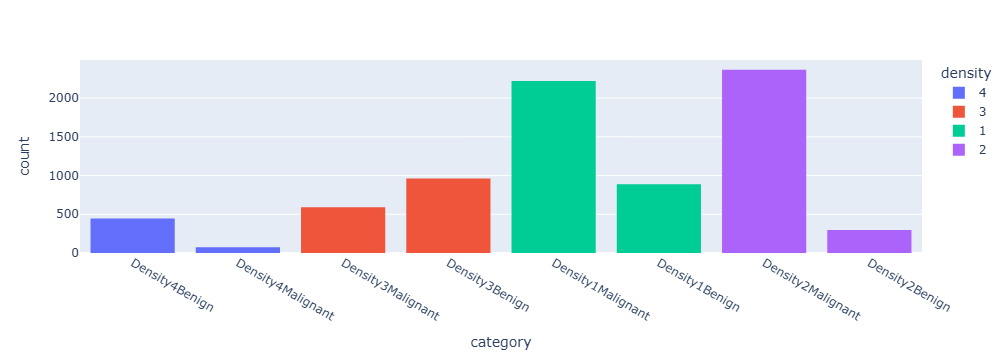

In [51]:
fig = px.histogram(df_DenseNet, x='category', color='density')
fig.show()

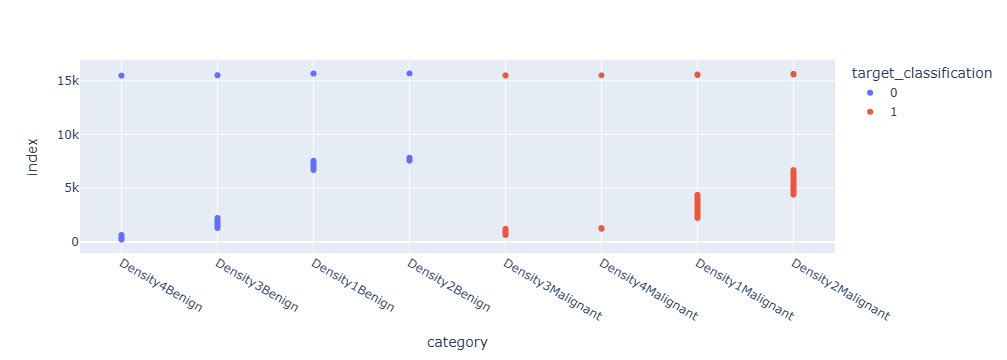

In [48]:
fig = px.scatter(df_DenseNet, x='category',color='target_classification')
fig.show()

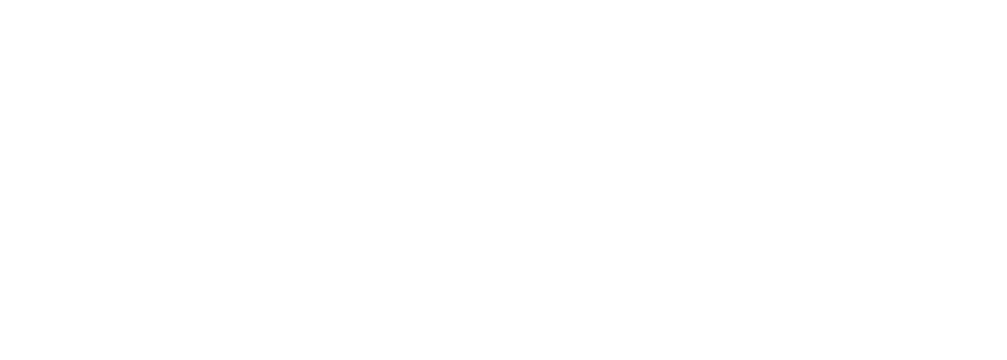

In [49]:
fig = px.scatter_3d(df_DenseNet,
                    x='target_classification',
                    ).update_layout(template='plotly')
fig.show()

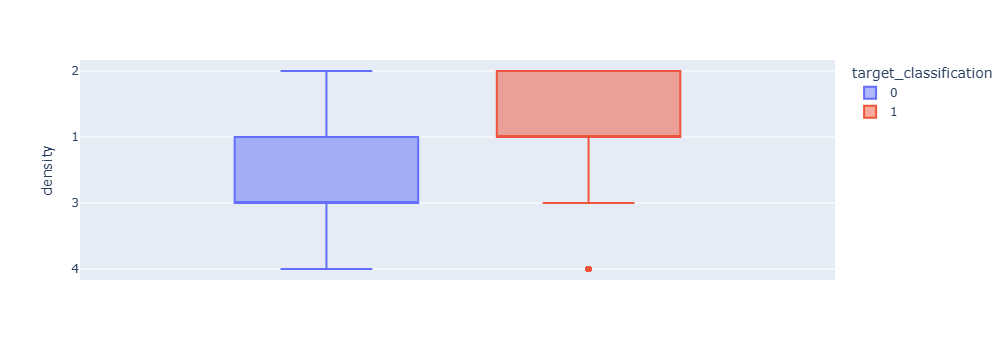

In [41]:
fig = px.box(df_DenseNet, y='density', height=500, color='target_classification').update_layout(template='plotly')
fig.show()